# Chapter 1 - Exercises

### Install Pacakges needed

In [1]:
install.packages("faraway")
install.packages("ggplot2")
install.packages("tidyr")

install.packages("ggplot2")            # Packages need to be installed only once
install.packages("GGally")   

Installing package into ‘/home/jeremyfbuss/R/x86_64-pc-linux-gnu-library/3.6’
(as ‘lib’ is unspecified)

Installing package into ‘/home/jeremyfbuss/R/x86_64-pc-linux-gnu-library/3.6’
(as ‘lib’ is unspecified)

Installing package into ‘/home/jeremyfbuss/R/x86_64-pc-linux-gnu-library/3.6’
(as ‘lib’ is unspecified)



### Load Libraries needed

In [2]:
library(tidyr)
library("ggplot2")                     # Load ggplot2 package
library("GGally") 

## 1. Explore teengamb

In [3]:
data(teengamb, package="faraway")
head(teengamb)

,sex,status,income,verbal,gamble
,<int>,<int>,<dbl>,<int>,<dbl>
1,1,51,2.00,8,0.0
2,1,28,2.50,8,0.0
3,1,37,2.00,6,0.0
4,1,28,7.00,4,7.3
5,1,65,2.00,8,19.6
6,1,61,3.47,6,0.1


In [4]:
# Change the categorical labels from 0 to male and 1 to female
teengamb$sex <- factor(teengamb$sex)
levels(teengamb$sex) <- c("male","female")

In [5]:
summary(teengamb)

     sex         status          income           verbal          gamble     
 male  :28   Min.   :18.00   Min.   : 0.600   Min.   : 1.00   Min.   :  0.0  
 female:19   1st Qu.:28.00   1st Qu.: 2.000   1st Qu.: 6.00   1st Qu.:  1.1  
             Median :43.00   Median : 3.250   Median : 7.00   Median :  6.0  
             Mean   :45.23   Mean   : 4.642   Mean   : 6.66   Mean   : 19.3  
             3rd Qu.:61.50   3rd Qu.: 6.210   3rd Qu.: 8.00   3rd Qu.: 19.4  
             Max.   :75.00   Max.   :15.000   Max.   :10.00   Max.   :156.0  

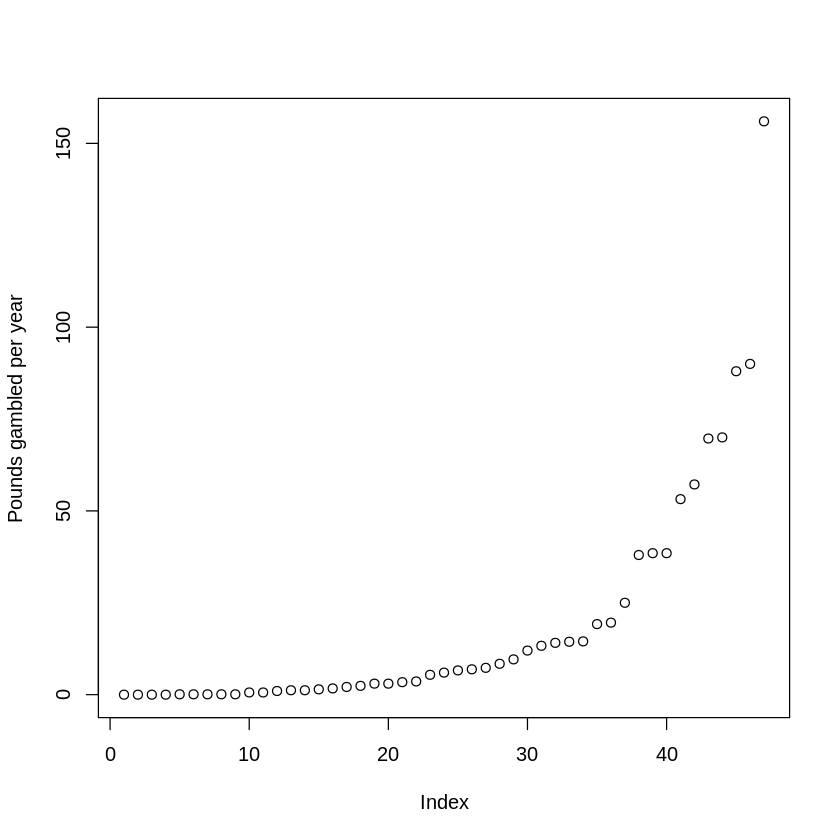

In [6]:
plot(sort(teengamb$gamble), ylab="Pounds gambled per year", main="")

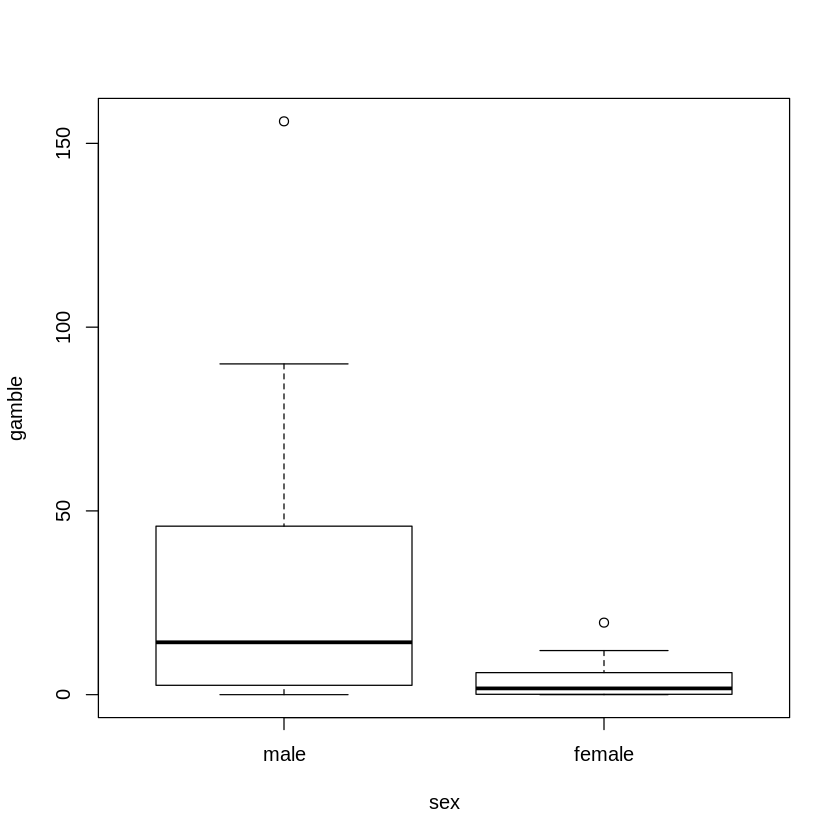

In [7]:
plot(gamble ~ sex, teengamb)

Loading required package: ggplot2



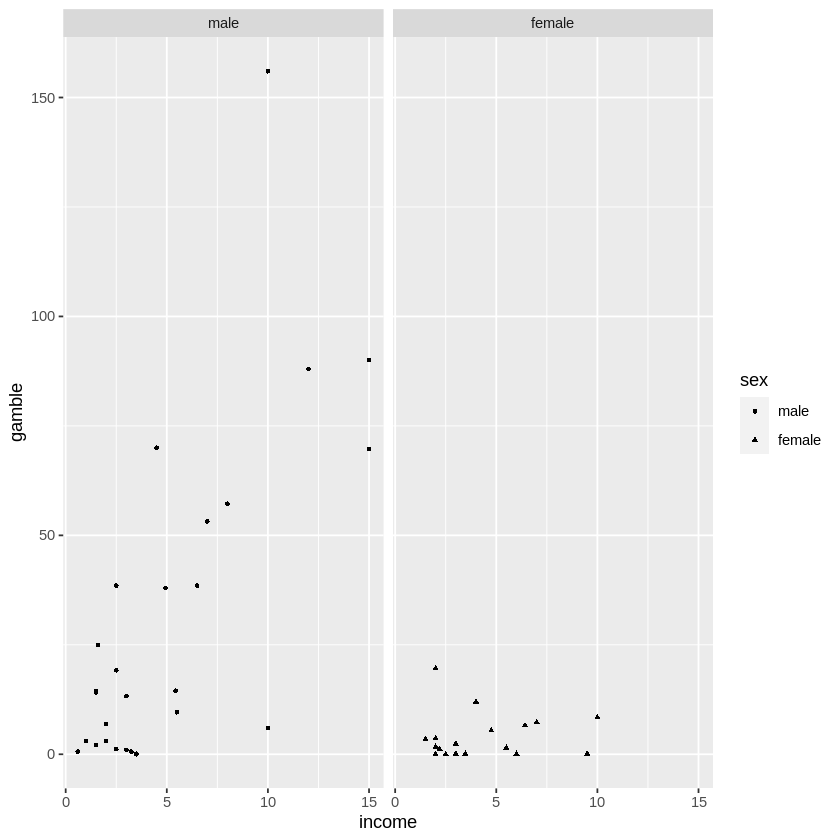

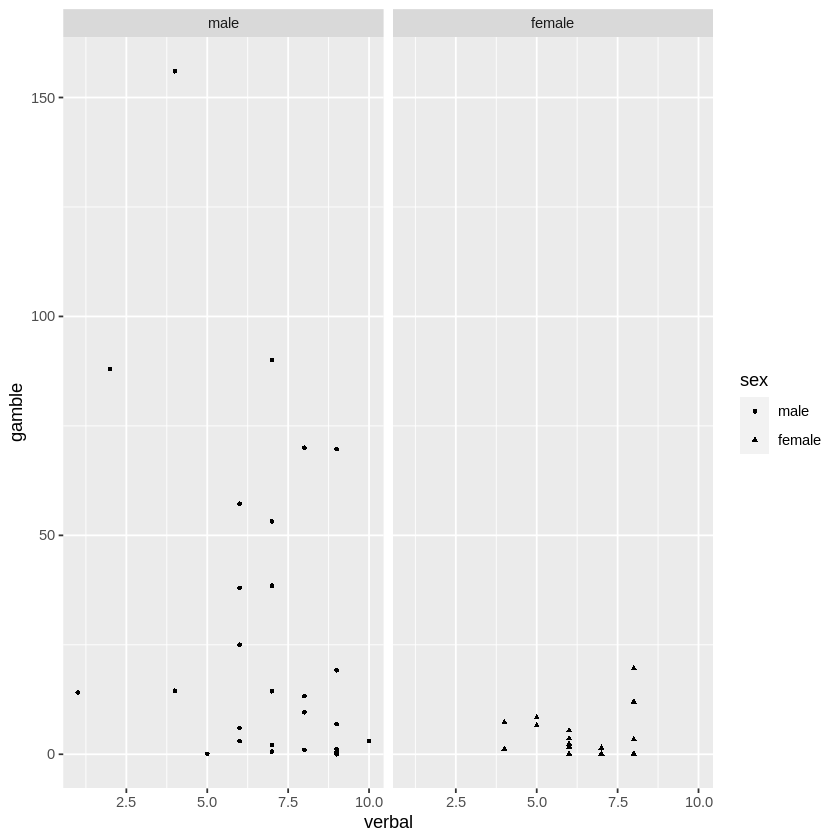

In [8]:
require(ggplot2)
ggplot(teengamb,aes(x=income,y=gamble,shape=sex))+geom_point(size=1)+facet_grid(~sex)
ggplot(teengamb,aes(x=verbal,y=gamble,shape=sex))+geom_point(size=1)+facet_grid(~sex)

### Findings

We see that most of the teens gabled very little. With summary and the pounds gambled per week plat showing ~75% of the teens gambled less than 20 pounds. 

Additionally the male teens showed a much stronger inclination to gambling than their female peers. Lastly, there is a weak inverse relationship between verbal accuity and gambling inclination.

## 1.2 Explore uswages

In [9]:
data(uswages, package="faraway")
head(uswages)

,wage,educ,exper,race,smsa,ne,mw,so,we,pt
,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
6085,771.60,18,18,0,1,1,0,0,0,0
23701,617.28,15,20,0,1,0,0,0,1,0
16208,957.83,16,9,0,1,0,0,1,0,0
2720,617.28,12,24,0,1,1,0,0,0,0
9723,902.18,14,12,0,1,0,1,0,0,0
22239,299.15,12,33,0,1,0,0,0,1,0


In [10]:
# Change categorical labels from 0 to white and 1 to black
uswages$race <- factor(uswages$race)
levels(uswages$race) <- c("white","black")
# Change categorical label for part time
uswages$employmenttype <- factor(uswages$pt)
levels(uswages$employmenttype) <- c("ft","pt")
# Change categorical label for SMSA
uswages$locationtype <- factor(uswages$smsa)
levels(uswages$locationtype) <- c("rural","smsa")

In [11]:
# Gather the separate columns based on region to be one region column
uswages <- uswages %>% gather(region, Y, ne:we)
# Remove the rows that now are "empty" for region based on previous "gather"
uswages <- uswages[uswages$Y != 0, ]

In [12]:
# Drop columns that are no longer needed
uswages <- within(uswages, rm(Y, pt, smsa))

In [13]:
summary(uswages)

      wage              educ           exper          race      employmenttype
 Min.   :  50.39   Min.   : 0.00   Min.   :-2.00   white:1844   ft:1815       
 1st Qu.: 308.64   1st Qu.:12.00   1st Qu.: 8.00   black: 156   pt: 185       
 Median : 522.32   Median :12.00   Median :15.00                              
 Mean   : 608.12   Mean   :13.11   Mean   :18.41                              
 3rd Qu.: 783.48   3rd Qu.:16.00   3rd Qu.:27.00                              
 Max.   :7716.05   Max.   :18.00   Max.   :59.00                              
 locationtype    region         
 rural: 488   Length:2000       
 smsa :1512   Class :character  
              Mode  :character  
                                
                                
                                

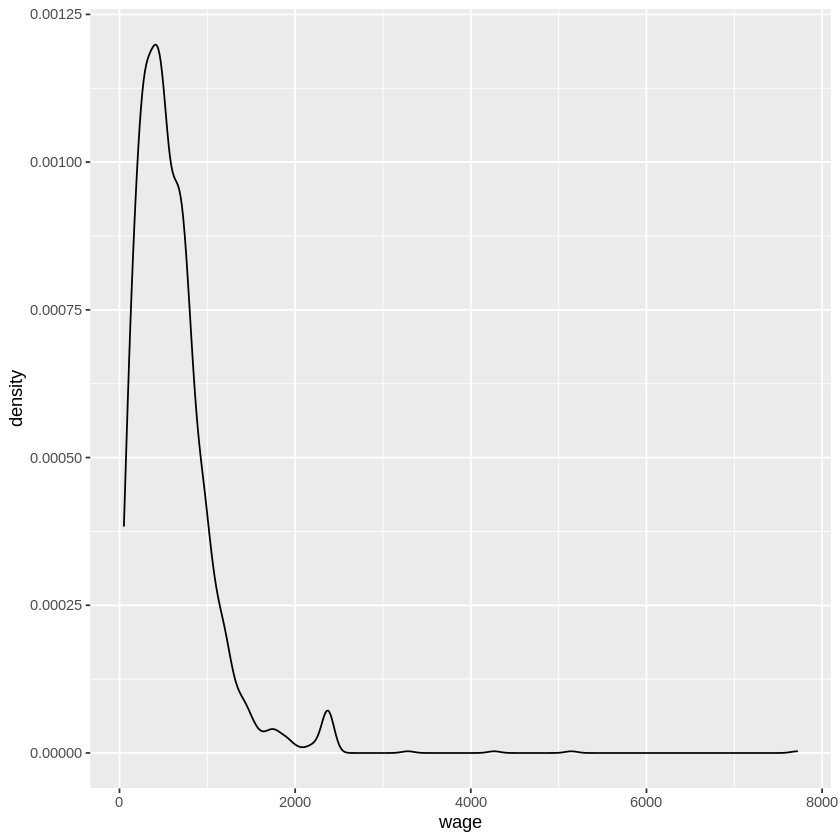

In [14]:
require(ggplot2)
ggplot(uswages, aes(x=wage))+geom_density()

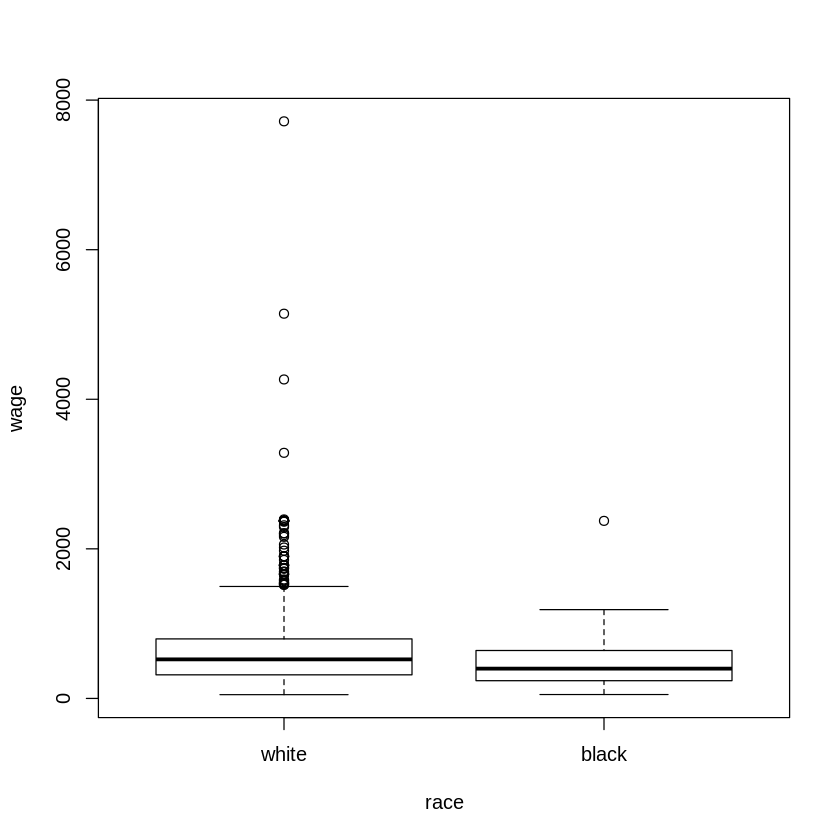

In [15]:
plot(wage ~ race, uswages)

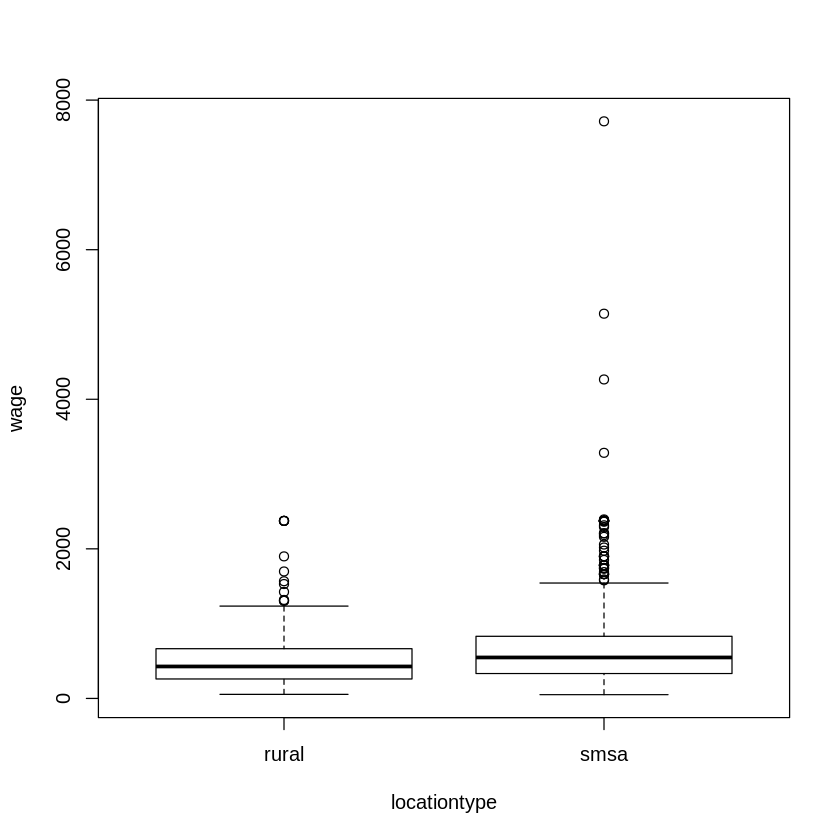

In [16]:
plot(wage ~ locationtype, uswages)

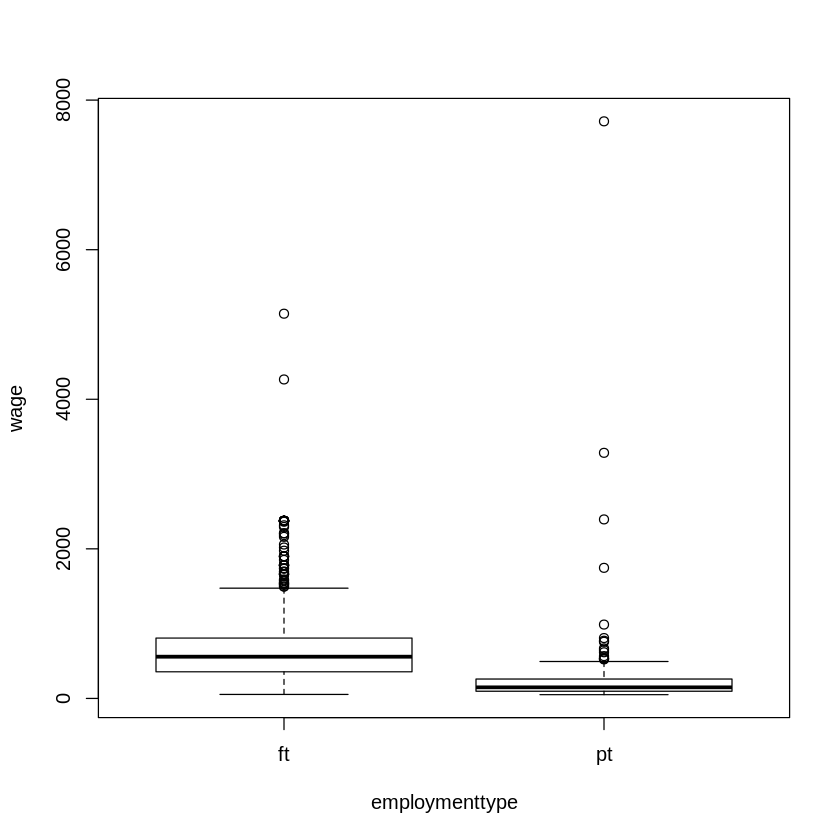

In [17]:
plot(wage ~ employmenttype, uswages)

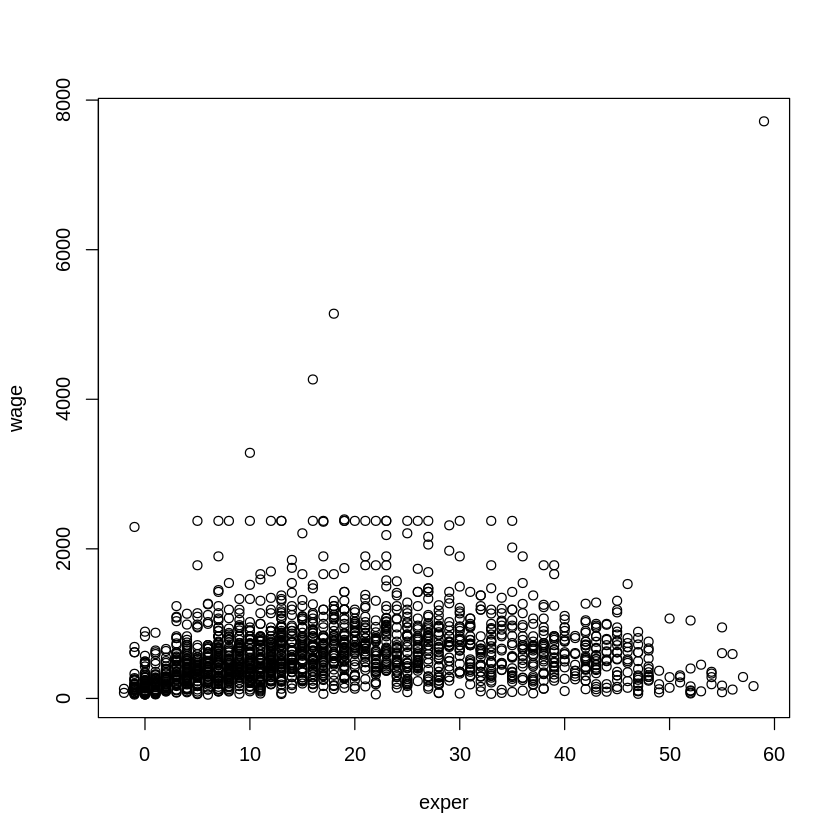

In [18]:
plot(wage ~ exper, uswages)

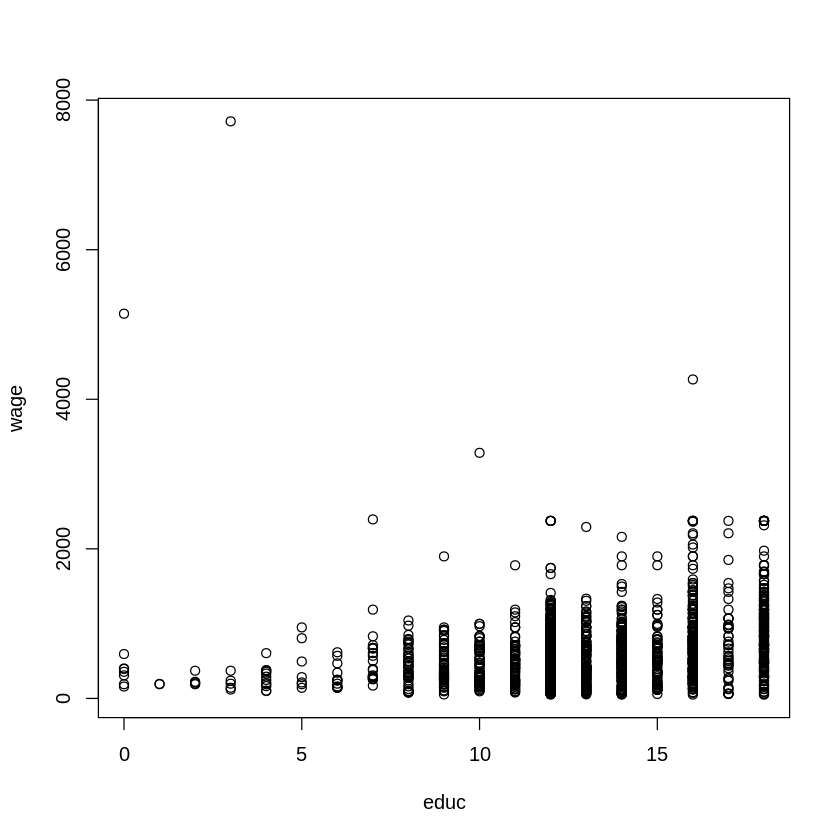

In [19]:
plot(wage ~ educ, uswages)

We see that the median wage is $522 and the mean wage is slightly more than that at $602, demonstrating the positive skew in the data. Additionally we see that averages along race and location type are similar but there is a much greater positive skew for white and smsa location type.

## 3. Explore prostate

In [20]:
data(prostate, package="faraway")
head(prostate)

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa
,<dbl>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,<int>,<dbl>
1,-0.5798185,2.7695,50,-1.386294,0,-1.38629,6,0,-0.43078
2,-0.9942523,3.3196,58,-1.386294,0,-1.38629,6,0,-0.16252
3,-0.5108256,2.6912,74,-1.386294,0,-1.38629,7,20,-0.16252
4,-1.2039728,3.2828,58,-1.386294,0,-1.38629,6,0,-0.16252
5,0.7514161,3.4324,62,-1.386294,0,-1.38629,6,0,0.37156
6,-1.0498221,3.2288,50,-1.386294,0,-1.38629,6,0,0.76547


In [21]:
summary(prostate)

     lcavol           lweight           age             lbph        
 Min.   :-1.3471   Min.   :2.375   Min.   :41.00   Min.   :-1.3863  
 1st Qu.: 0.5128   1st Qu.:3.376   1st Qu.:60.00   1st Qu.:-1.3863  
 Median : 1.4469   Median :3.623   Median :65.00   Median : 0.3001  
 Mean   : 1.3500   Mean   :3.653   Mean   :63.87   Mean   : 0.1004  
 3rd Qu.: 2.1270   3rd Qu.:3.878   3rd Qu.:68.00   3rd Qu.: 1.5581  
 Max.   : 3.8210   Max.   :6.108   Max.   :79.00   Max.   : 2.3263  
      svi              lcp             gleason          pgg45       
 Min.   :0.0000   Min.   :-1.3863   Min.   :6.000   Min.   :  0.00  
 1st Qu.:0.0000   1st Qu.:-1.3863   1st Qu.:6.000   1st Qu.:  0.00  
 Median :0.0000   Median :-0.7985   Median :7.000   Median : 15.00  
 Mean   :0.2165   Mean   :-0.1794   Mean   :6.753   Mean   : 24.38  
 3rd Qu.:0.0000   3rd Qu.: 1.1786   3rd Qu.:7.000   3rd Qu.: 40.00  
 Max.   :1.0000   Max.   : 2.9042   Max.   :9.000   Max.   :100.00  
      lpsa        
 Min.   :-0.430

In [26]:
install.packages("ggplot2")            # Packages need to be installed only once
install.packages("GGally")
 
library("ggplot2")                     # Load ggplot2 package
library("GGally")         

Installing package into ‘/home/jeremyfbuss/R/x86_64-pc-linux-gnu-library/3.6’
(as ‘lib’ is unspecified)

Installing package into ‘/home/jeremyfbuss/R/x86_64-pc-linux-gnu-library/3.6’
(as ‘lib’ is unspecified)

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



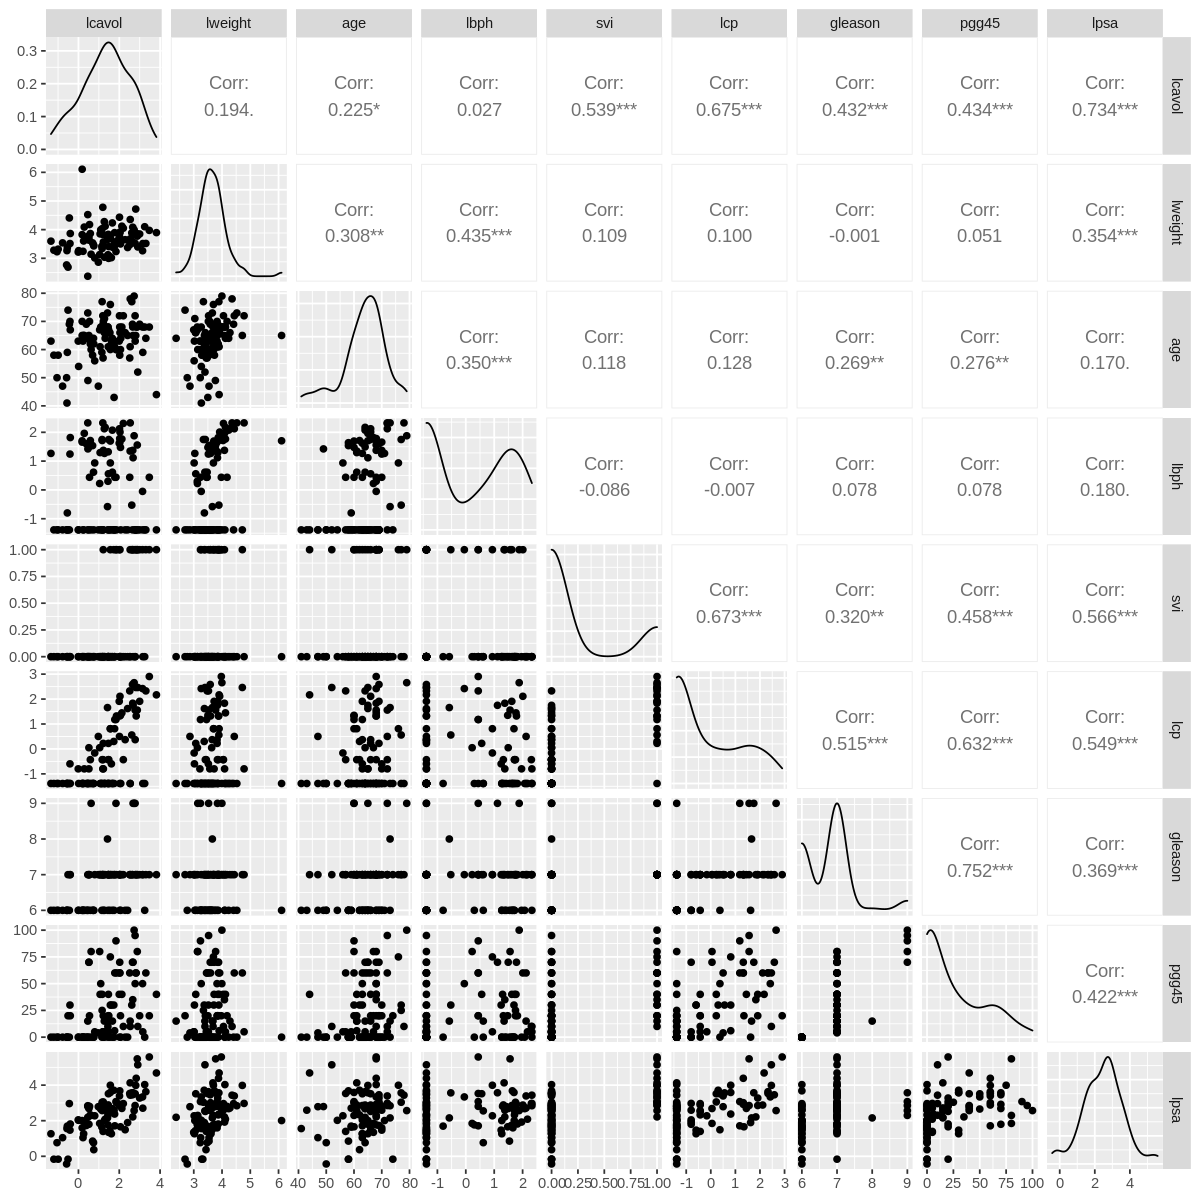

In [41]:
options(repr.plot.width=10, repr.plot.height=10)
ggpairs(prostate) 

## 4. Explore sat

In [28]:
data(sat, package="faraway")
head(sat)

,expend,ratio,salary,takers,verbal,math,total
,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>
Alabama,4.405,17.2,31.144,8,491,538,1029
Alaska,8.963,17.6,47.951,47,445,489,934
Arizona,4.778,19.3,32.175,27,448,496,944
Arkansas,4.459,17.1,28.934,6,482,523,1005
California,4.992,24.0,41.078,45,417,485,902
Colorado,5.443,18.4,34.571,29,462,518,980


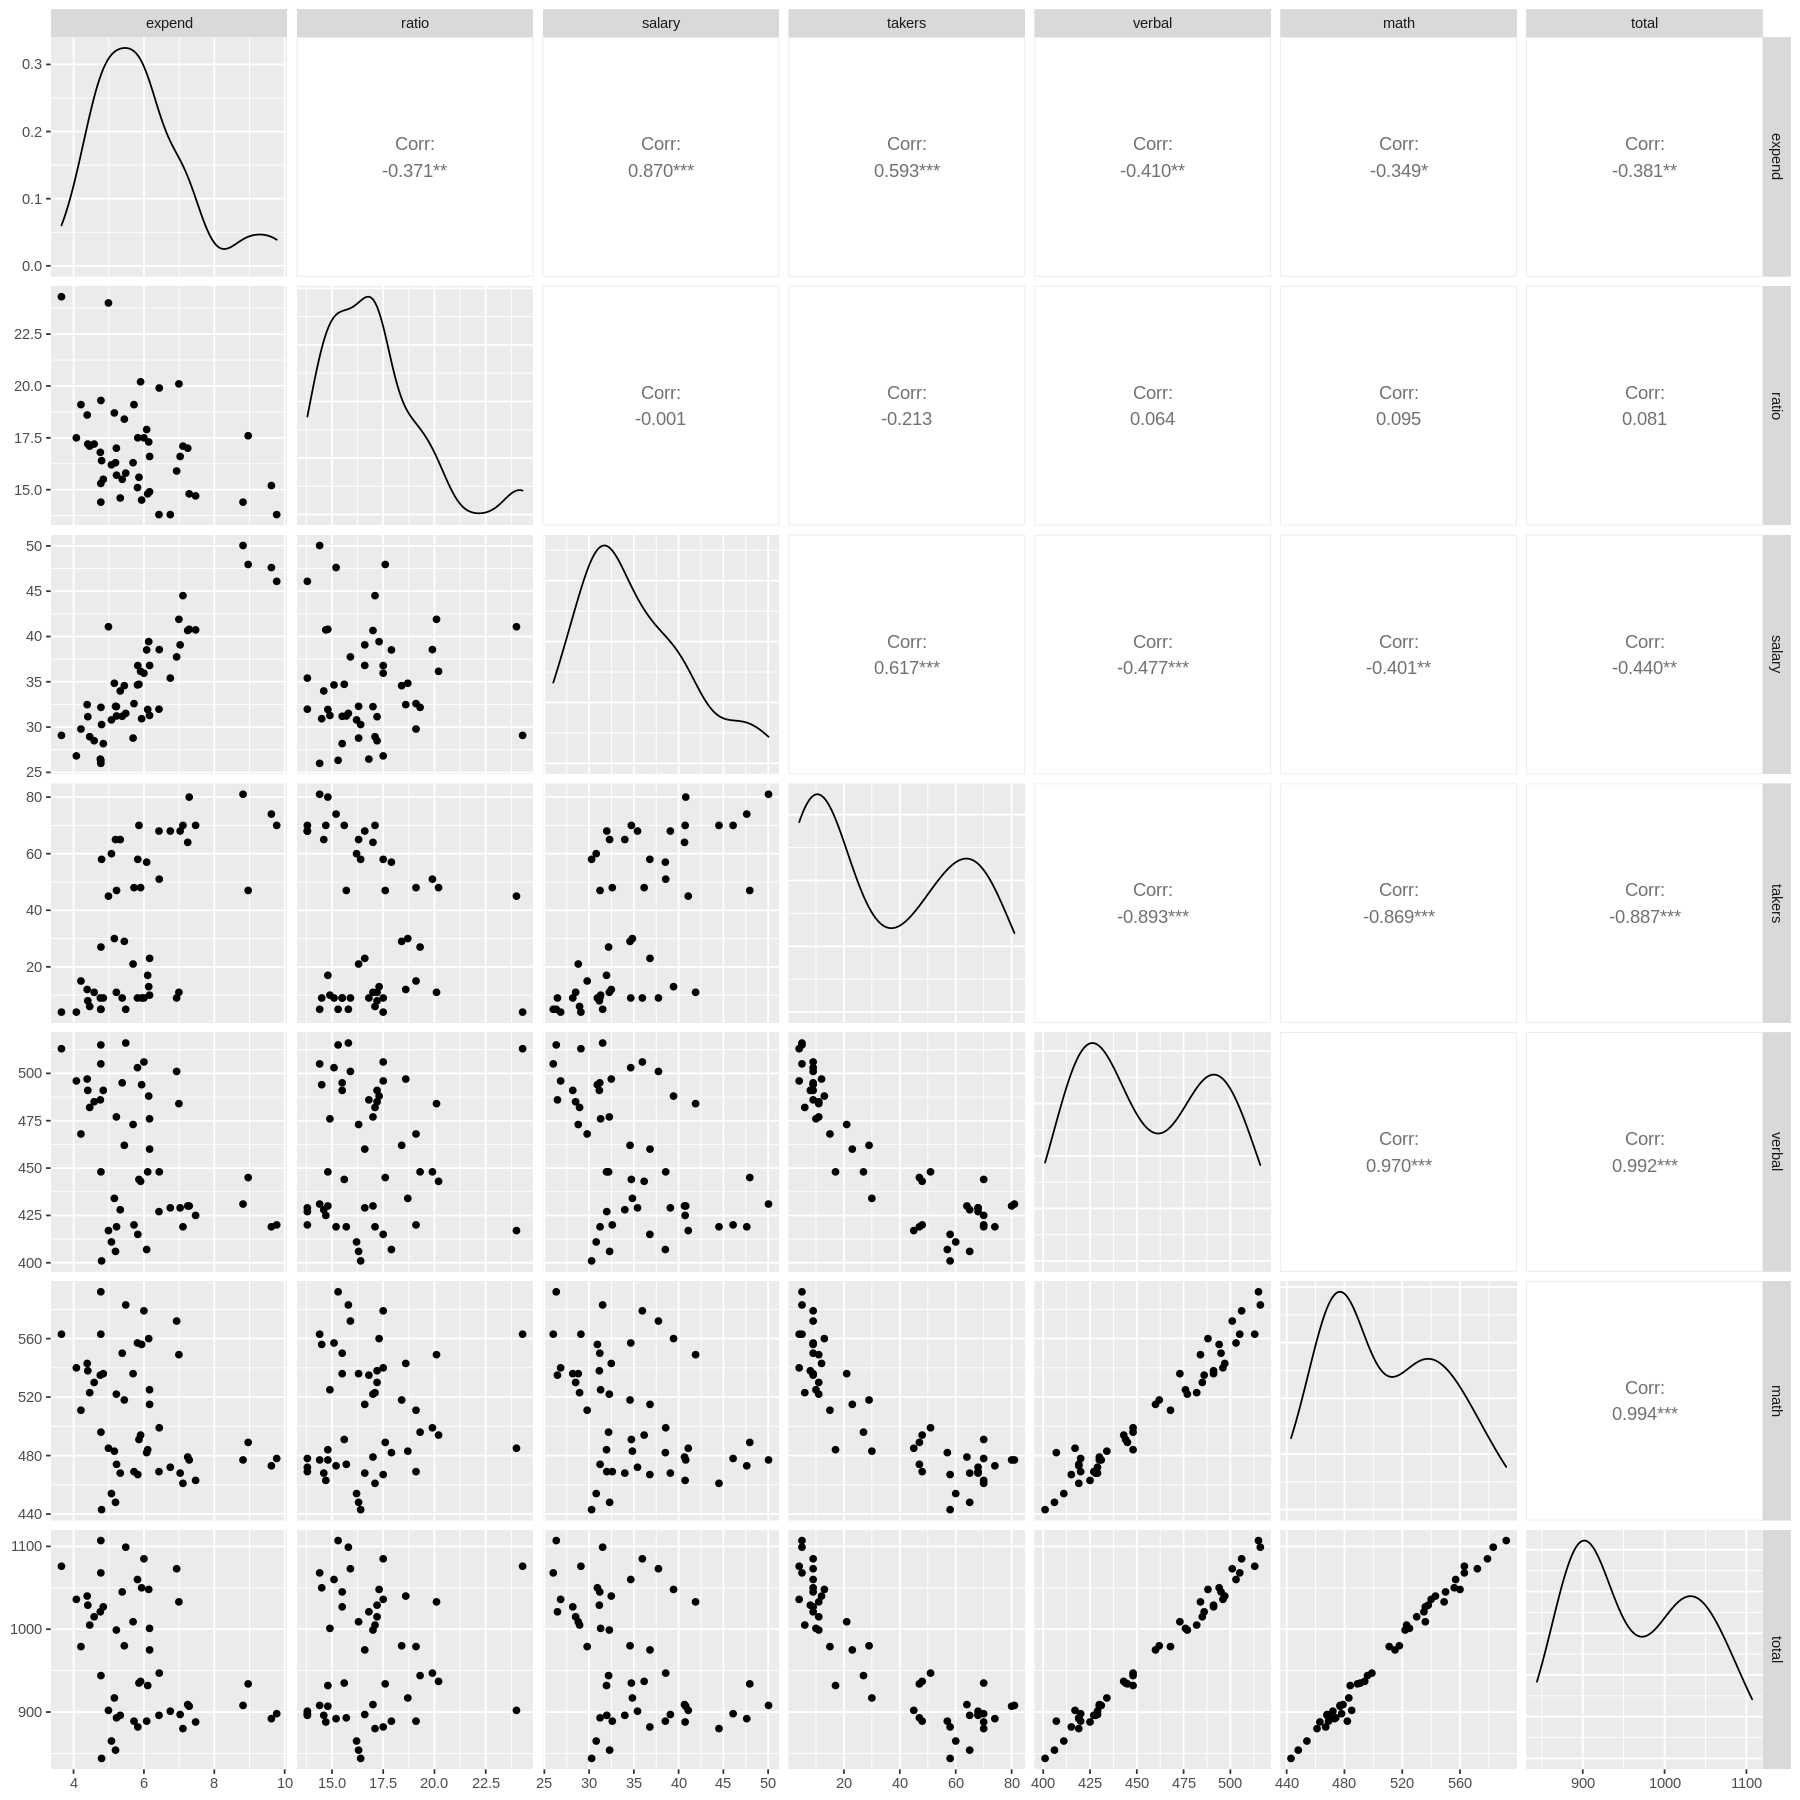

In [44]:
options(repr.plot.width=15, repr.plot.height=15)
ggpairs(sat)

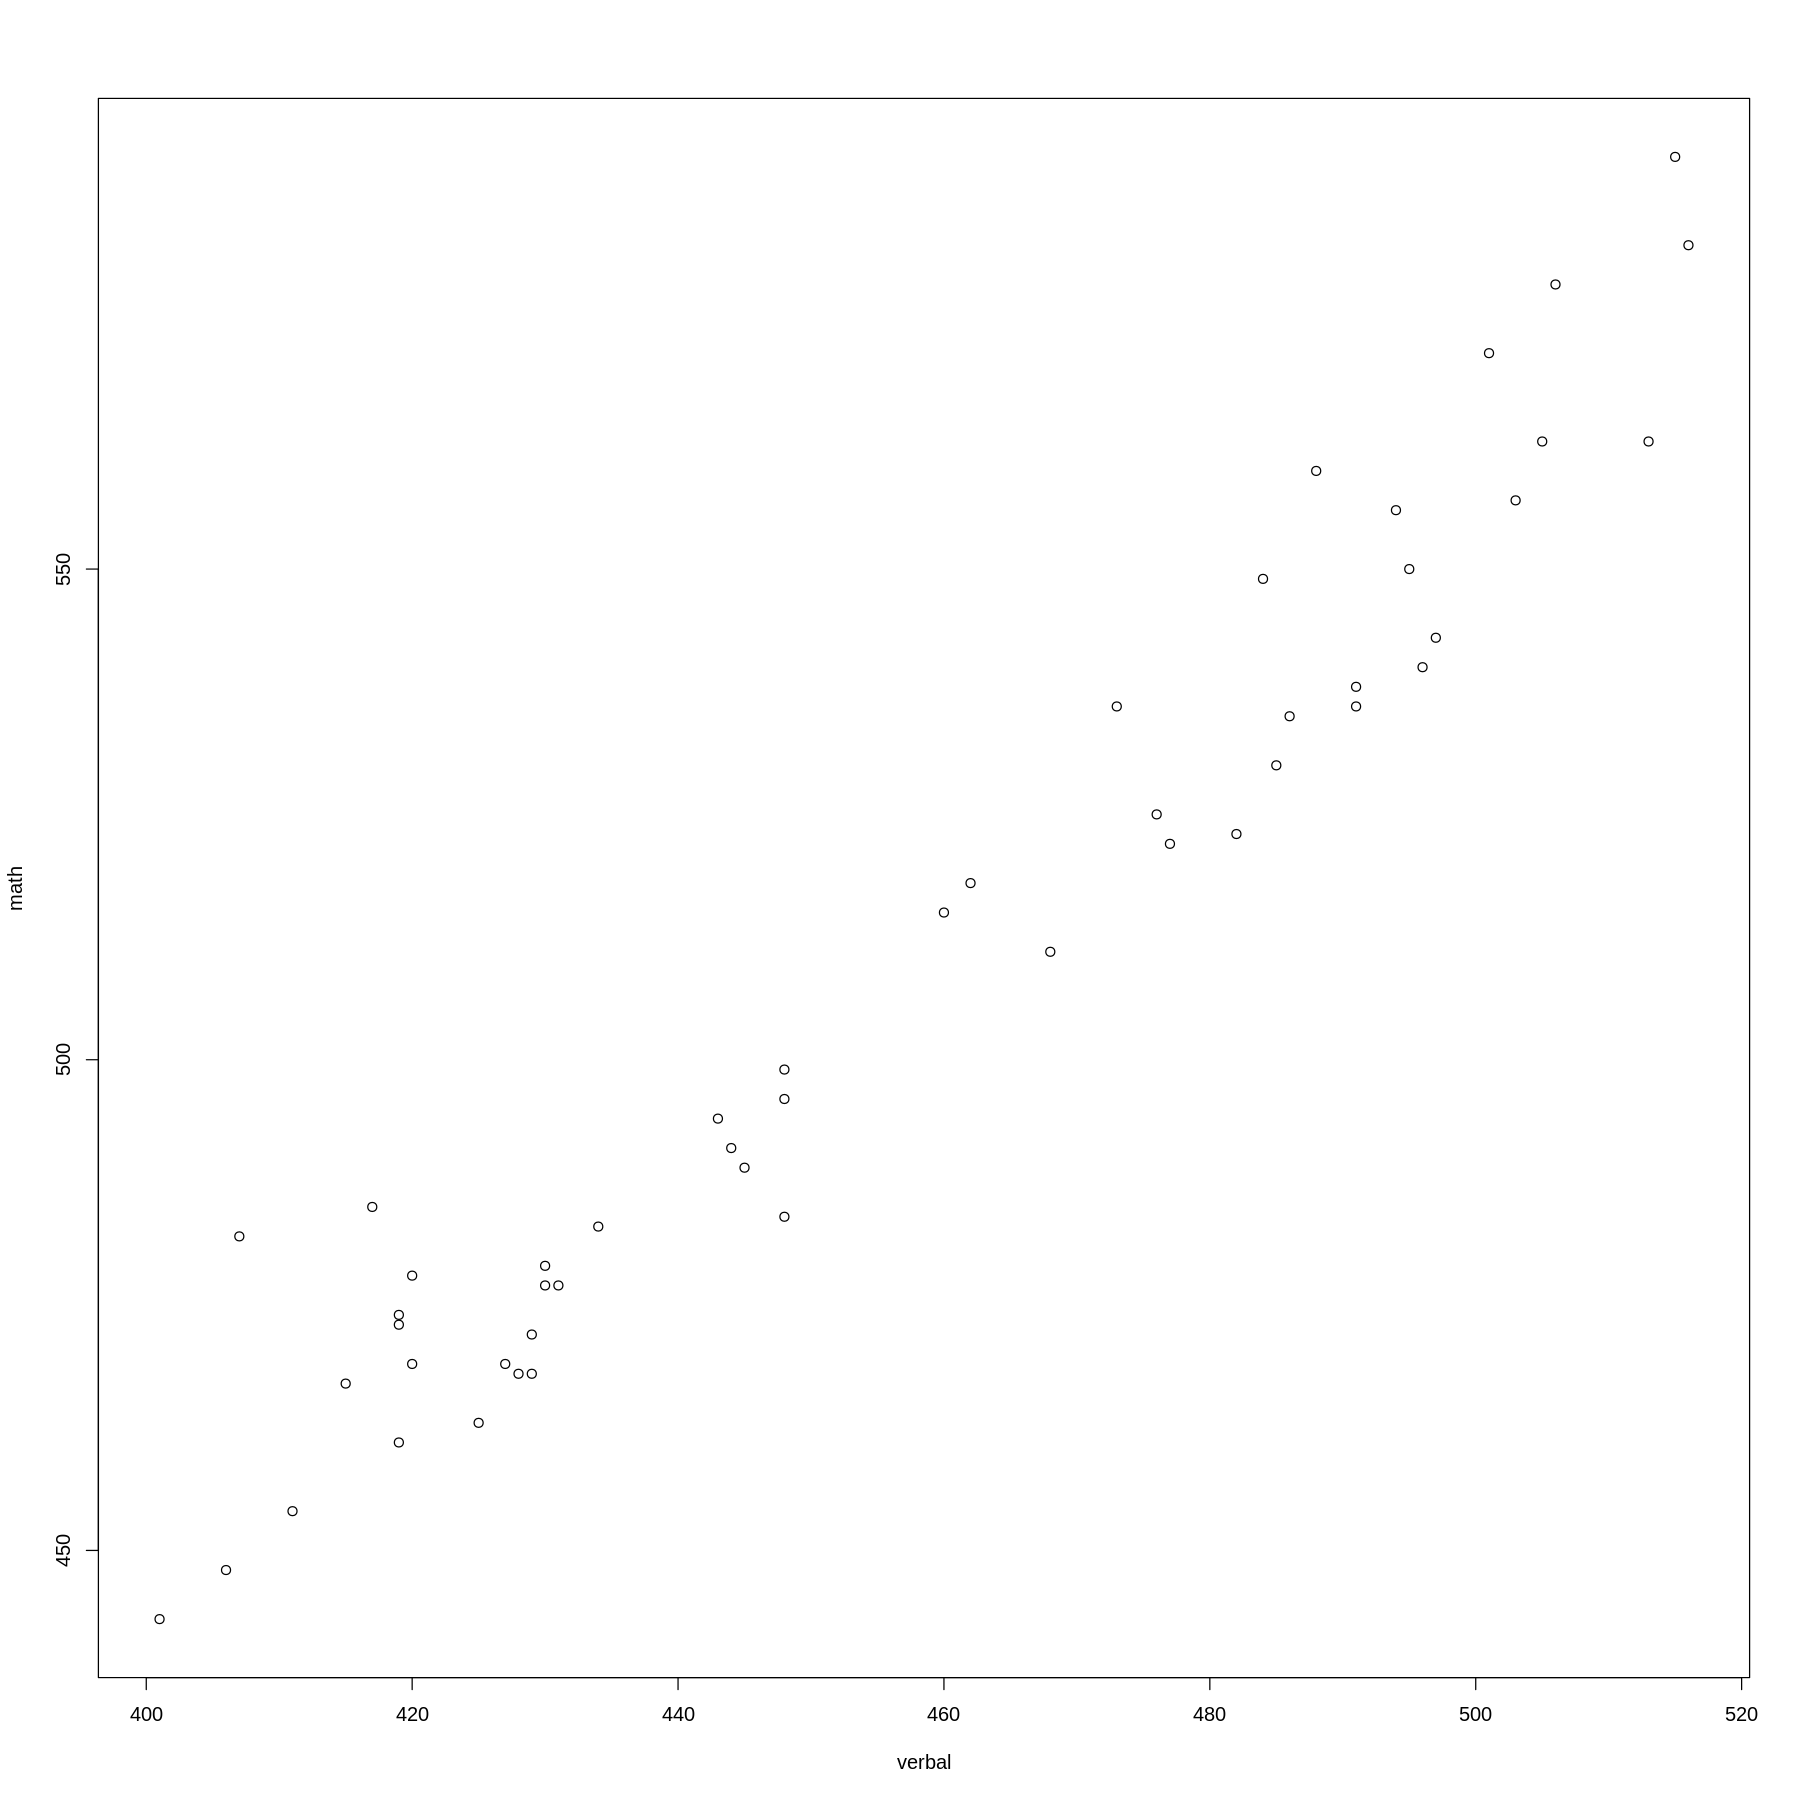

In [50]:
plot(math ~ verbal, sat)

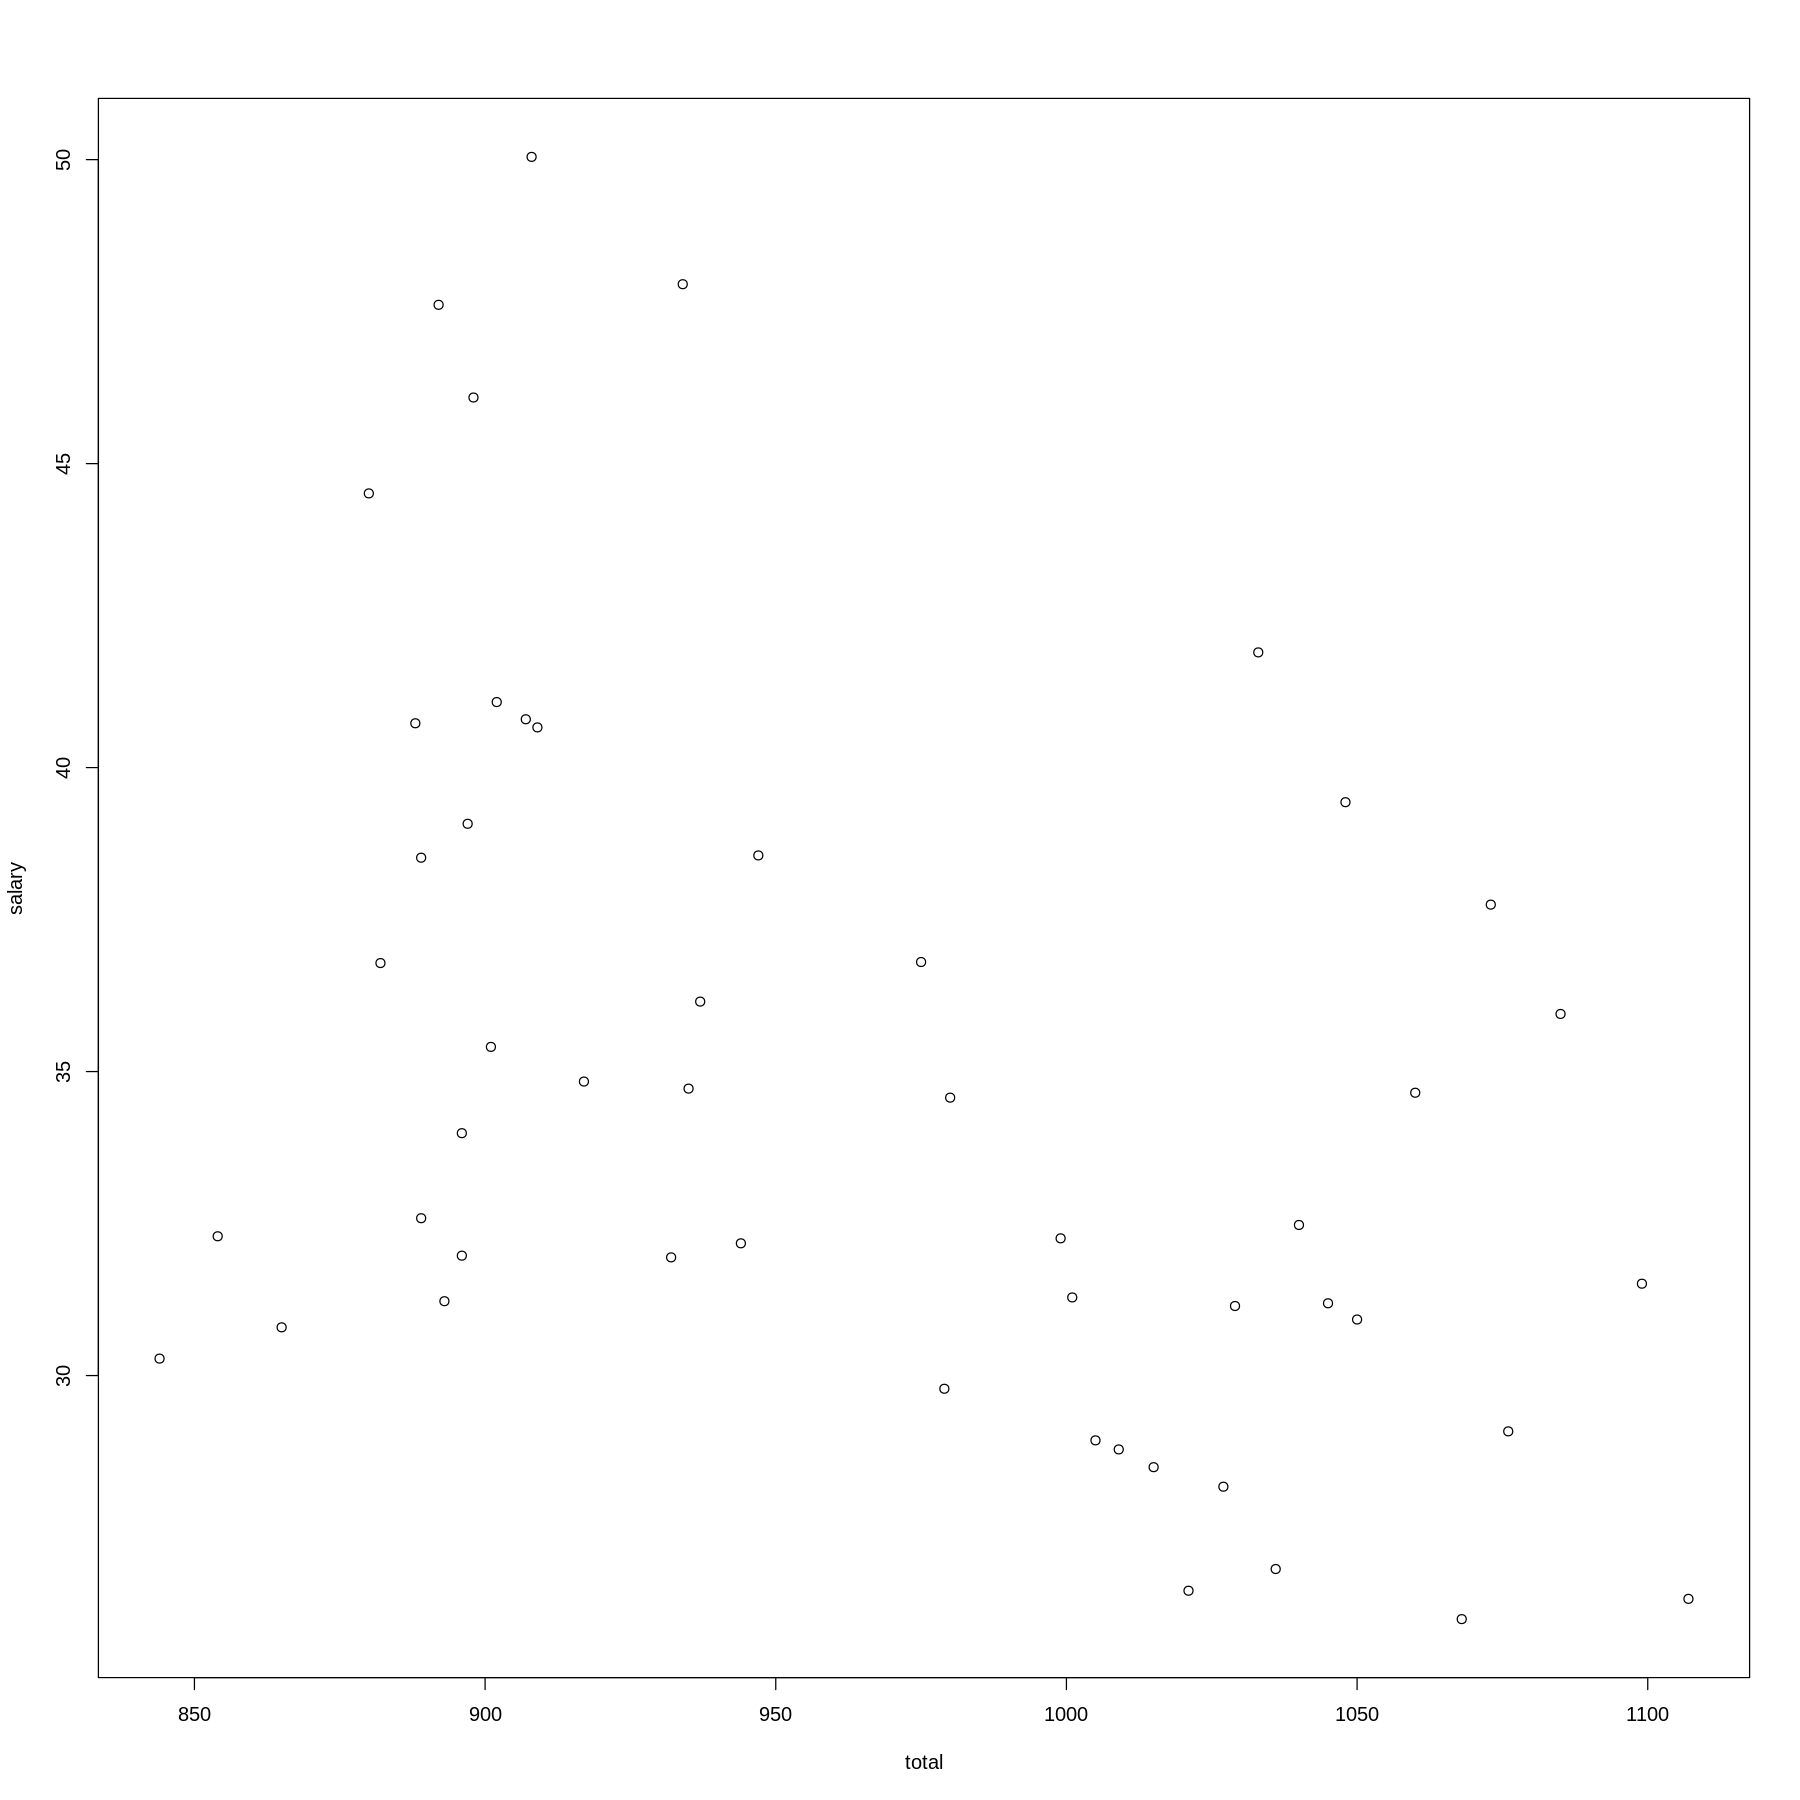

In [52]:
plot(salary ~ total, sat)

In [ ]:
plot()

### Findings

As the number of test takers in the state goes up the average scores come down. This may point to a selective effect whereby small numbers of test takers indicate high motivation and aptitude, however as the pool size increases there are a number of students with lower aptitude taking the tests.

The scores of math and verbal are highly correlated. 

Salary and expenditure are negatively correlated to the total score. 

## 5. Explore divusa

In [46]:
data(divusa, package="faraway")
head(divusa)

,year,divorce,unemployed,femlab,marriage,birth,military
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1920,8.0,5.2,22.70,92.0,117.9,3.2247
2,1921,7.2,11.7,22.79,83.0,119.8,3.5614
3,1922,6.6,6.7,22.88,79.7,111.2,2.4553
4,1923,7.1,2.4,22.97,85.2,110.5,2.2065
5,1924,7.2,5.0,23.06,80.3,110.9,2.2889
6,1925,7.2,3.2,23.15,79.2,106.6,2.1735


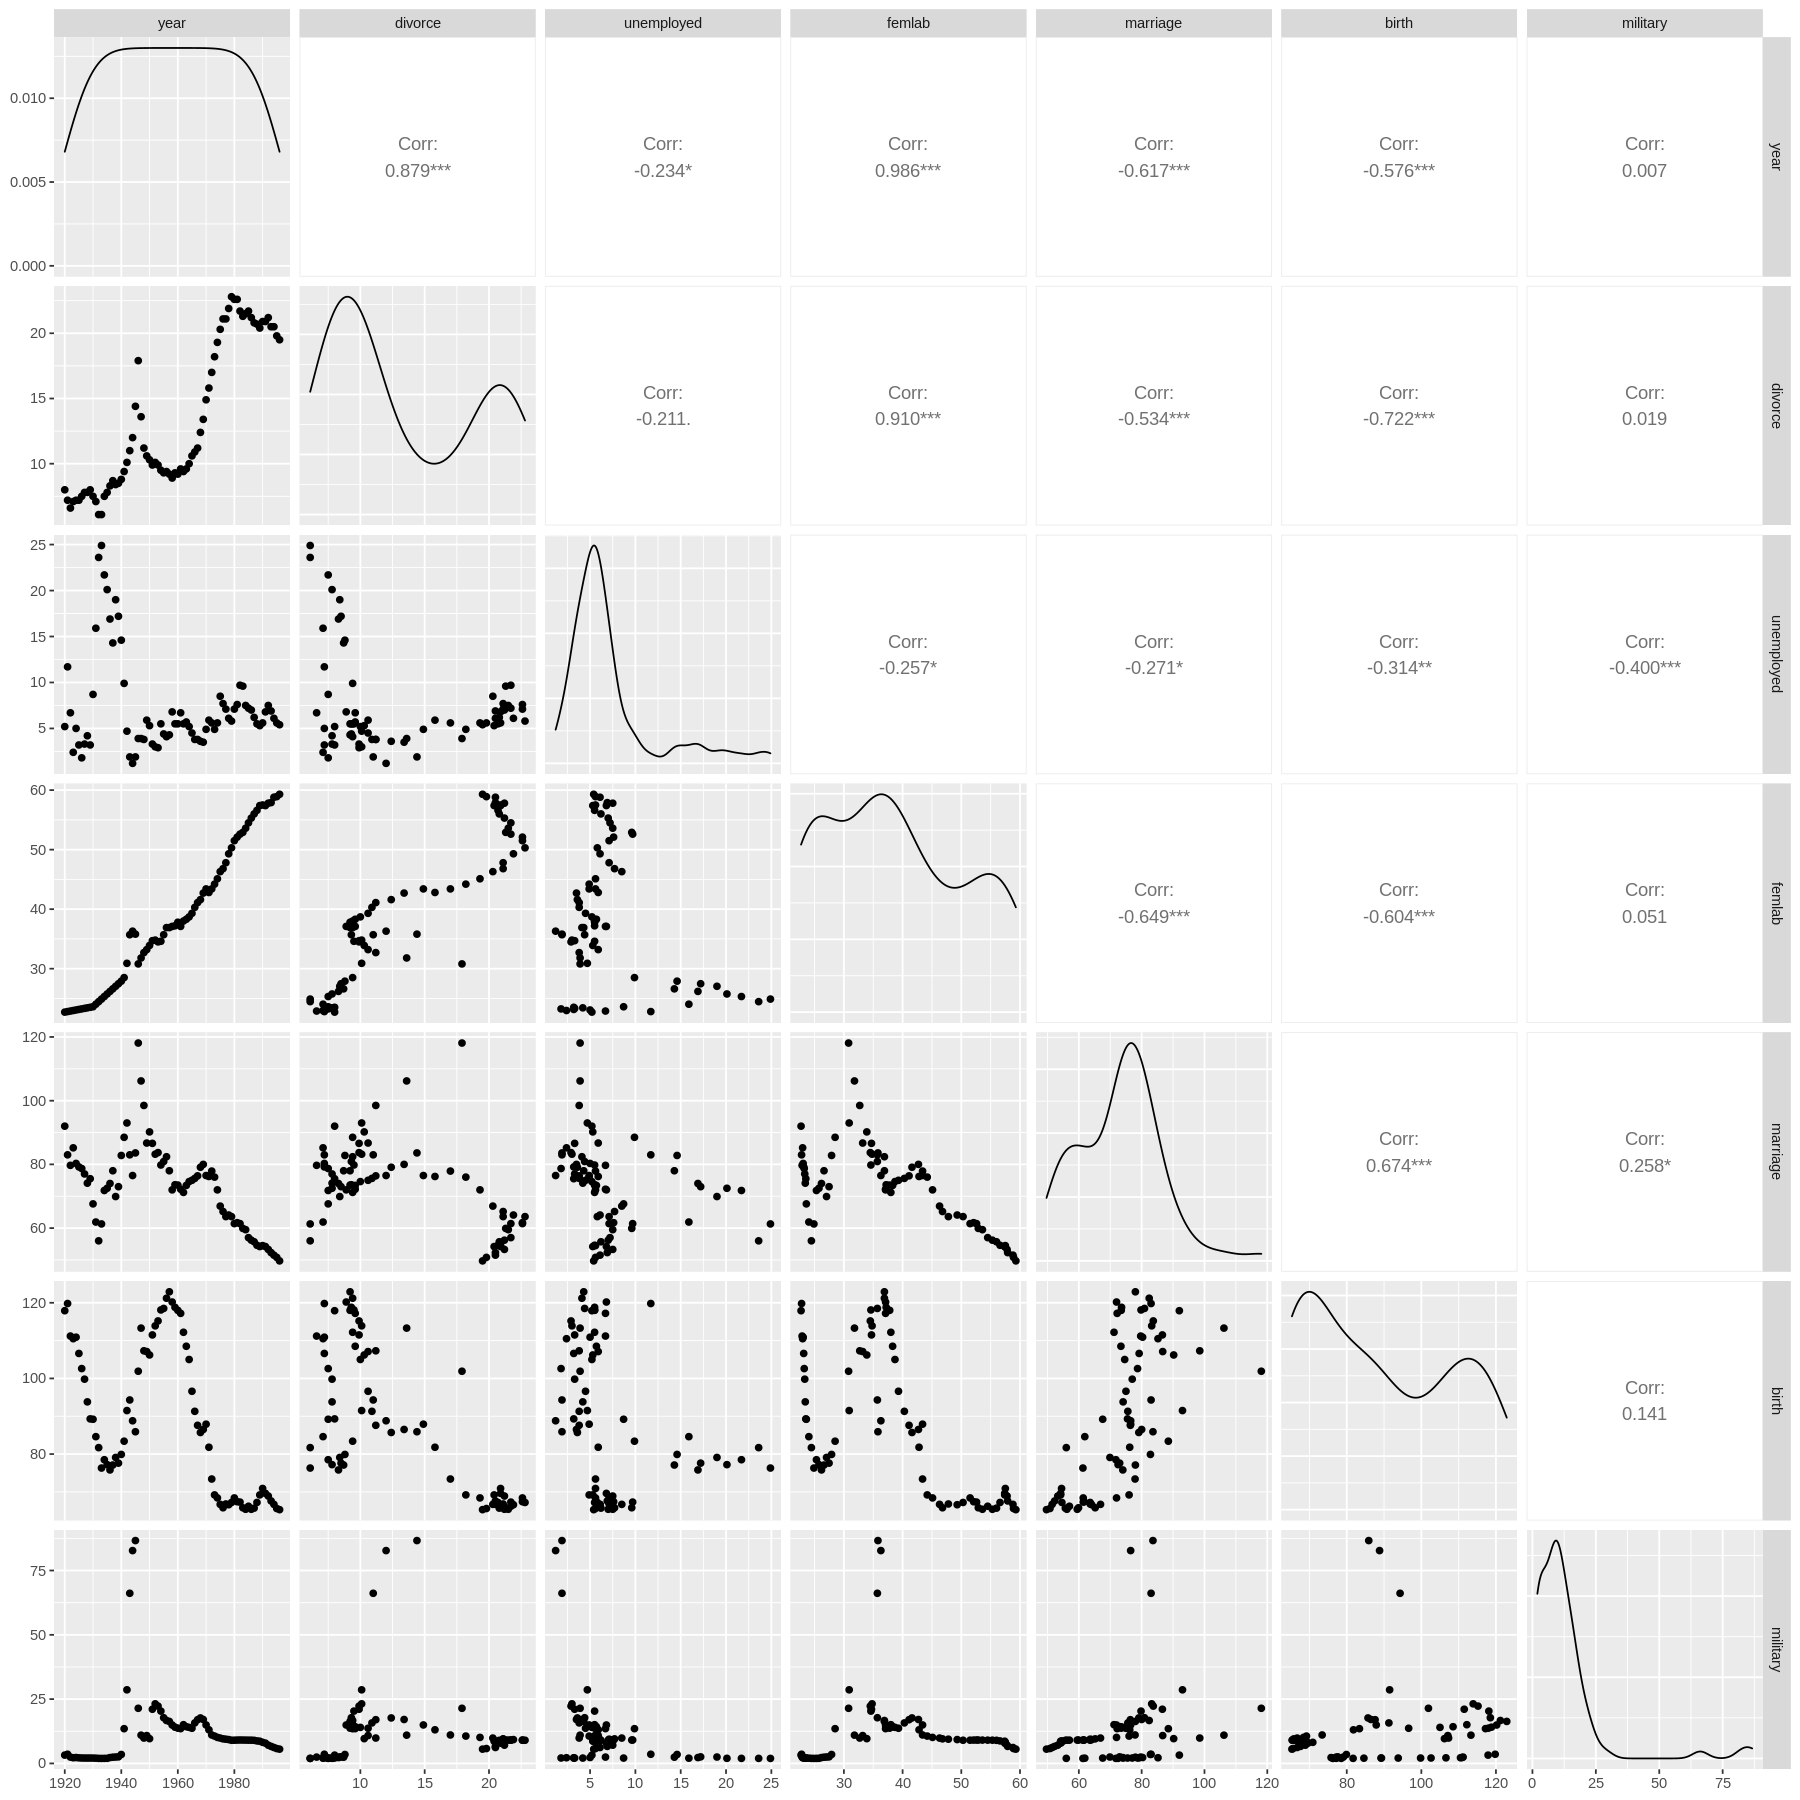

In [49]:
ggpairs(divusa)